<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Principal Component Analysis
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction, data visualization and feature extraction. 
<br>
• It helps to identify patterns in high-dimensional datasets by transforming them into a lower-dimensional space while retaining the most important features.
<br>
• PCA reduces the dimensionality of data while retaining the most important features.
<br>

</div>

In [93]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [94]:
# Reading CSV File
df = pd.read_csv('mnist.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [95]:
# Shape of the DataFrame
df.shape

(42000, 785)

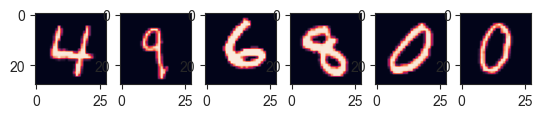

In [96]:
# Random Plots from MNIST Data
import random
plt.subplots(ncols=6)
plt.subplot(1,6,1)
plt.imshow(df.iloc[random.randint(1,100), 1:].values.reshape(28,28))
plt.subplot(1,6,2)
plt.imshow(df.iloc[random.randint(1,100), 1:].values.reshape(28,28))
plt.subplot(1,6,3)
plt.imshow(df.iloc[random.randint(1,100), 1:].values.reshape(28,28))
plt.subplot(1,6,4)
plt.imshow(df.iloc[random.randint(1,100), 1:].values.reshape(28,28))
plt.subplot(1,6,5)
plt.imshow(df.iloc[random.randint(1,100), 1:].values.reshape(28,28))
plt.subplot(1,6,6)
plt.imshow(df.iloc[random.randint(1,100), 1:].values.reshape(28,28))
plt.show()

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Train Test Split</strong>
<br>
The train-test split is a common technique in machine learning for evaluating model performance. It involves dividing your dataset into two parts :
<br>
• <strong>Training Set :</strong> Used to train the model.
<br>
• <strong>Testing Set :</strong> Used to evaluate the model's performance on unseen data.
<br>
<br>
<strong>Parameters</strong>
<br>
• <strong>arrays :</strong> This can be a list or a tuple of arrays (e.g, features and target variables).
<br>
• <strong>test_size :</strong> Determines the proportion of the dataset to include in the test split (e.g, 0.2 for 20%).
<br>
• <strong>random_state :</strong> Controls the shuffling applied to the data before the split (e.g., any integer).
<br>
• <strong>shuffle :</strong> A boolean that indicates whether to shuffle the data before splitting.
</div>

In [97]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [98]:
# Defining Features and Target Variables
X = df.drop('label', axis=1)
y = df['label']

In [99]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
# Shape of Training and Testing Set
print(f' Training Set : {X_train.shape} \n Testing Set : {X_test.shape} ')

 Training Set : (33600, 784) 
 Testing Set : (8400, 784) 


<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Mathematical Foundation</strong>
<br>
<br>
<strong>1. Standardization</strong>
<br>
• Before applying PCA, it is essential to standardize the data especially if the features are on different scales. 
<br>
• The standardized value is computed as :
$$z_i = \frac{x_i - \mu}{\sigma}$$
where, $\mu$ is the mean and $\sigma$ is the standard deviation.
<br>
<strong>2. Covariance Matrix</strong>
<br>
• The covariance matrix expresses how the dimensions vary from the mean with respect to each other. 
<br>
• For a dataset with $n$ samples and $p$ features, the covariance matrix $C$ is :
$$C = \frac{1}{n-1} (X^T X)$$
where $X$ is the matrix of standardized data.
<br>
<strong>3. Eigenvalues and Eigenvectors</strong>
<br>
• To find the principal components, compute the eigenvalues and eigenvectors of the covariance matrix.
<br>
• The eigenvectors define the directions of the principal components, while the eigenvalues represent the variance captured by each eigenvector.
<br>
• The eigenvalue equation is :
$$C v = \lambda v$$
where $v$ is an eigenvector and $\lambda$ is its corresponding eigenvalue.
<br>
<strong>4. Selecting Principal Components</strong>
<br>
• Sort the eigenvalues in descending order and select the top $k$ eigenvectors. 
<br>
• The cumulative variance explained can be calculated as :
$${Explained Variance Ratio} = \frac{\lambda_i}{\sum \lambda}$$
for \( i = 1, 2, ..., k \).
<br>
<strong>5. Transformation</strong>
<br>
• Finally, transform the original data into the new subspace defined by the selected eigenvectors :
$$Y = X W$$
where $W$ is the matrix of the selected eigenvectors.
</div>

In [101]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [102]:
# Creating StandardScaler Object
scaler = StandardScaler()

In [103]:
# Fit and Transform on Training Data
X_train_scaled = scaler.fit_transform(X_train)

In [104]:
# Transforming Testing Data
X_test_scaled = scaler.transform(X_test)

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Sklearn PCA</strong>
<br>
<br>
• The PCA class in Scikit-Learn is used for performing Principal Component Analysis. 
<br>
• It provides methods for fitting and transforming data, allowing for dimensionality reduction.
<br>
<br>
<strong>Parameters</strong>
<br>
• When you instantiate the PCA class, you can specify several parameters :
<br>
<strong>1. n_components</strong>
<br>
• This parameter defines the number of principal components to keep.
<br>
• If an integer is given, it specifies the exact number of components.
<br>
• If None, all components are kept.
<br>
• If 'mle', it uses maximum likelihood estimation to determine the number of components.
<br>
<strong>2. copy</strong>
<br>
• If True, it makes a copy of the input data; otherwise, it performs the operation in-place.
<br>
<br>
<strong>Attributes</strong>
<br>
• After fitting the PCA model, several attributes become available.
<br>
<strong>1. components_</strong>
<br>
• This is an array of shape (n_components, n_features) containing the principal axes in feature space, representing the directions of maximum variance.
<br>
<strong>2. explained_variance_</strong>
<br>
• This is an array of shape (n_components) that contains the eigenvalues corresponding to each principal component. 
<br>
• It indicates the amount of variance explained by each component.
<br>
<strong>3. explained_variance_ratio_</strong>
<br>
• This is an array of shape (n_components) that contains the percentage of variance explained by each of the selected components. 
<br>
• It helps in understanding how much information is retained.
<br>
<strong>4. singular_values_</strong>
<br>
• This is an array of shape (n_components) containing the singular values corresponding to each principal component. 
<br>
• These values are related to the explained variance.
<br>
<strong>5. mean_</strong>
<br>
• This is an array of shape (n_features) representing the mean of the original dataset used for centering the data before fitting.
<br>
<strong>6. n_components_</strong>
<br>
• This indicates the number of components chosen (may differ from n_components if n_components is set to None or if the maximum number of components is less than requested).
<br>
<strong>7. n_features_in_</strong>
<br>
• This indicates the number of features in the original dataset.
</div>

In [105]:
# Importing PCA
from sklearn.decomposition import PCA

In [106]:
# Creating PCA Object for 2 Features
pca = PCA(n_components=2)

In [107]:
# Fit and Transform on Training Data
X_train_pca = pca.fit_transform(X_train_scaled)

In [108]:
# Transforming Testing Data
X_test_pca = pca.transform(X_test_scaled)

In [109]:
# Shape before and after Transformation
print(f' Shape before Transformation : {X_train.shape} \n Shape after Transformation : {X_train_pca.shape} ')

 Shape before Transformation : (33600, 784) 
 Shape after Transformation : (33600, 2) 


In [110]:
# Converting Array into DataFrame
X_train_pca = pd.DataFrame(X_train_pca)

In [111]:
# Data Visualization using 2 Features Only
fig = px.scatter(x=X_train_pca.iloc[:,0],
                 y=X_train_pca.iloc[:,1],
                 color=y_train)
fig.show()

In [112]:
# Creating PCA Object for 2 Features
pca = PCA(n_components=3)

In [113]:
# Fit and Transform on Training Data
X_train_pca = pca.fit_transform(X_train_scaled)

In [114]:
# Transforming Testing Data
X_test_pca = pca.transform(X_test_scaled)

In [115]:
# Shape before and after Transformation
print(f' Shape before Transformation : {X_train.shape} \n Shape after Transformation : {X_train_pca.shape} ')

 Shape before Transformation : (33600, 784) 
 Shape after Transformation : (33600, 3) 


In [116]:
# Converting Array into DataFrame
X_train_pca = pd.DataFrame(X_train_pca)

In [117]:
# Data Visualization using 3 Features Only
fig = px.scatter_3d(x=X_train_pca.iloc[:,0], y=X_train_pca.iloc[:,1], z=X_train_pca.iloc[:,2],
              color=y_train)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [118]:
# Eigen Values
pca.explained_variance_

array([41.11527168, 29.1734678 , 26.75507531])

In [119]:
# Eigen Vector
pca.components_

array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [120]:
# Percentage of variance explained by each component
pca.explained_variance_ratio_*100

array([5.856702  , 4.15564096, 3.81115086])

In [121]:
# Number of components choosen
pca.n_components_

3

In [122]:
# Number of features in Original Data
pca.n_features_in_

784

In [123]:
# Creating PCA Object for all Features
pca = PCA(n_components=None)

In [124]:
# Fit and Transform on Training Data
X_train_pca = pca.fit_transform(X_train_scaled)

In [125]:
# Transforming Testing Data
X_test_pca = pca.transform(X_test_scaled)

In [126]:
# Shape before and after Transformation
print(f' Shape before Transformation : {X_train.shape} \n Shape after Transformation : {X_train_pca.shape} ')

 Shape before Transformation : (33600, 784) 
 Shape after Transformation : (33600, 784) 


In [127]:
# Eigen Values
pca.explained_variance_.shape

(784,)

In [128]:
# Eigen Vector
pca.components_.shape

(784, 784)

In [129]:
# Percentage of variance explained by each component
pca.explained_variance_ratio_.shape

(784,)

In [130]:
# Number of features in Original Data
pca.n_features_in_

784

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
Selecting the optimal number of components in PCA can be effectively done through visualizations. 
<br>
Two common methods for this are the Scree Plot and the Cumulative Explained Variance Plot. 
<br>
<br>
<strong>1. Scree Plot</strong>
<br>
• A Scree Plot displays the eigenvalues (or explained variance) against the number of components. 
<br>
• It helps you visualize how much variance is explained by each principal component.
<br>
<br>
<strong>2. Cumulative Explained Variance Plot</strong>
<br>
• This plot shows the cumulative explained variance as a function of the number of components.
<br>
• It helps in understanding how many components are required to explain a certain percentage of the variance in the data.
</div>

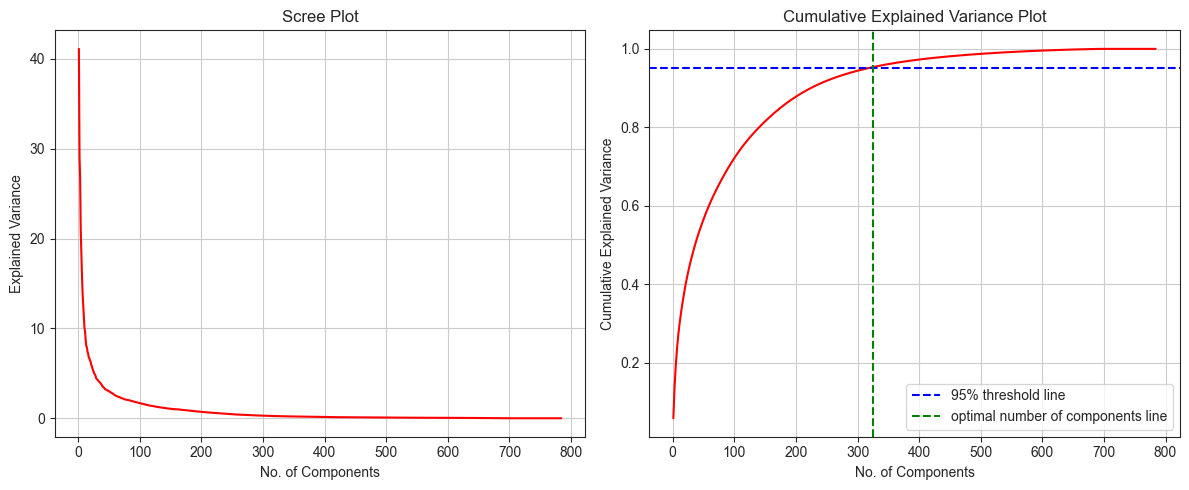

In [131]:
# Plot to select optimal number of features
sns.set_style('ticks')
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, color='red')
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), color='red')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='b', linestyle='--', label='95% threshold line')
plt.axvline(x=325, color='g', linestyle='--', label='optimal number of components line')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()